# 서울 날씨 트위터를 위한 머신러닝

![서울타워](https://raw.githubusercontent.com/leehaesung/AWS_BIG_DATA_SPECIALTY/master/data/QRCode.png.png)

* Data set: daily-minimum-temperatures.csv (호주 멜번시티 날씨 데이터 1981-1991)

* Date: 23rd Apr 2019

* Coded By Haesung Lee

* AWS-IoT Diagram:

![Image](https://raw.githubusercontent.com/leehaesung/AWS_BIG_DATA_SPECIALTY/master/data/AWS-IoT_Analytics.png)


In [8]:
# create and evaluate an updated autoregressive model
import pandas as pa
import matplotlib as plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('https://github.com/leehaesung/AWS_BIG_DATA_SPECIALTY/raw/master/data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)



In [9]:
#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 
DustDataSeries = series

#view top 10 records
DustDataSeries.head(10)

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
Name: Temp, dtype: float64

In [10]:
#view basic stats information on data
DustDataSeries.describe()

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64

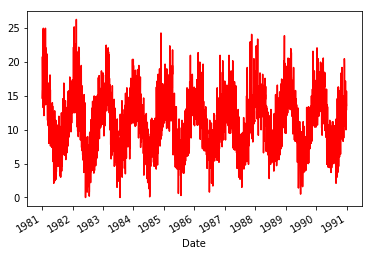

In [11]:
#plot the time series data
DustDataSeries.plot(color='red')

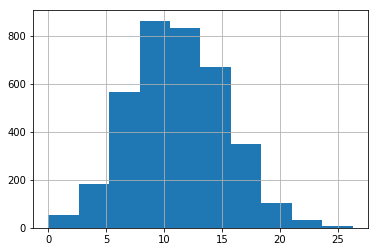

In [12]:
DustDataSeries.hist()

{sensor:10.516887,prediction:13.100000}
{sensor:10.635221,prediction:10.400000}
{sensor:10.003677,prediction:8.200000}
{sensor:8.852938,prediction:9.800000}
{sensor:9.886231,prediction:7.500000}
{sensor:6.792670,prediction:5.800000}
{sensor:7.160823,prediction:9.800000}
{sensor:9.650363,prediction:7.900000}
{sensor:8.829359,prediction:8.700000}
{sensor:9.529251,prediction:10.000000}
{sensor:8.959702,prediction:10.600000}
{sensor:8.875840,prediction:8.000000}
{sensor:8.133483,prediction:10.200000}
{sensor:10.900761,prediction:15.100000}
{sensor:12.452629,prediction:13.900000}
{sensor:11.762038,prediction:9.200000}
{sensor:8.820777,prediction:9.000000}
{sensor:9.050355,prediction:13.200000}
{sensor:12.610260,prediction:7.000000}
{sensor:8.471894,prediction:10.600000}
{sensor:10.678898,prediction:6.900000}
{sensor:7.818808,prediction:9.500000}
{sensor:10.797404,prediction:12.500000}
{sensor:10.292688,prediction:13.600000}
{sensor:11.155045,prediction:17.700000}
{sensor:13.807228,predictio

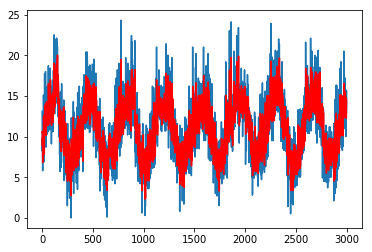

In [17]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('https://github.com/leehaesung/AWS_BIG_DATA_SPECIALTY/raw/master/data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-3000], X[len(X)-3000:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('{sensor:%f,prediction:%f}' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('{TestRMSE:%.3f}' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# END